# Polynomial Regression

Simple Linear Regression : y = b0 + b1x1
<br>
Multiple Linear Regression : y = b0 + b1x1 + b2x2 + .. + bnxn
<br>
Polynomial Linear Regression : y = b0 + b1x1 + b2(x1)^2 + .. + bn(x1)^n

When to use: The line that fits the data doesn't fit well linearly. Fits better in a parabolic curve or a <b>non linear</b> dataset.
<br>
Examples: Describe how diseases spread/pandemics

Polynomal Regression is not actually Linear as it can learn non-linear relationships BUT
<br>
It is known as Polynomial <b>Linear</b> Regression because when we're talking about linear/not linear, we're not talking about variables (x1..), we're talking about coefficients (b0,b1,b2) and y can be described linear w.r.t coefficients even though y cannot be described as linear w.r.t variables (x1..)

---

### Problem Statement:

A person has asked our company's department for a certain salary(huge) so we retrieved salary structure data of his current organization to predict what would his current salary be based on his experience

He has around <b>6.5 years</b> experience and is asking for <b>160K</b> salary based on the reasoning that he earns the same in his current company

## Importing the libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [80]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [81]:
X = dataset.iloc[:, 1].values
Y = dataset.iloc[:, -1].values
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

## Training the Linear Regression model on the whole dataset

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lin_reg = LinearRegression()

In [84]:
X.reshape(-1,1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [85]:
lin_reg.fit(X.reshape(-1,1), Y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

Equation = b0 + b1x1 + b2(x1)^2 + .. + bn(x1)^n

We only have x1 available to us so we need to create a matrix of features : x1, (x1)^2 and so on and 
then we will pass that into the linear regression FIT



In [86]:
#Import class that will help us create the matrix of features
from sklearn.preprocessing import PolynomialFeatures

#By passing degree = 2, we create a structure for two features x1 and (x1)^2
poly_reg = PolynomialFeatures(degree = 2)

#Transform the features/Apply above to a column/feature from our data i.e turn one column into matrix of features
X_poly = poly_reg.fit_transform(X.reshape(-1,1))

#Train the LinearRegression model on the X_poly matrix features
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

## Visualising the Linear Regression results

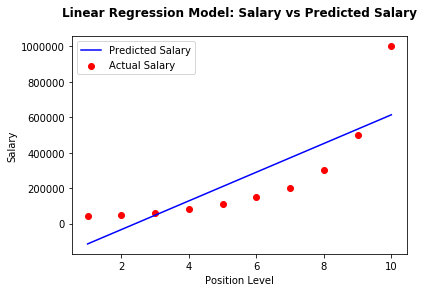

In [89]:
plt.scatter(X, Y, color='red', label='Actual Salary')
#We have to pass X and Y coordinates to plot function to make a line X: X and Y: Predicted Line
plt.plot(X, lin_reg.predict(X.reshape(-1,1)), color="blue", label="Predicted Salary")

#Formatting
plt.title("Linear Regression Model: Salary vs Predicted Salary",pad=20,fontsize=12, fontweight = 'bold')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

## Visualising the Polynomial Regression results

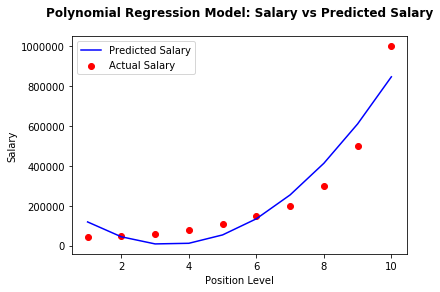

In [90]:
plt.scatter(X, Y, color='red', label='Actual Salary')
#We have to pass coordinates to plot function to make a line X: X and Y: Predicted Line
plt.plot(X, lin_reg_2.predict(X_poly), color="blue", label="Predicted Salary")

plt.title("Polynomial Regression Model: Salary vs Predicted Salary",pad=20,fontsize=12, fontweight = 'bold')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

As we increase the degree and hence the number of features in the matrix, the curve becomes better fit

The idea is to increase the degree and also increase the number of points to predict the values on(just to get a better curve)

Same concept as <b>Data Densification</b> in Tableau

<b>np.arange(1,10,2)</b>

O/P: array([1, 3, 5, 7, 9])

Start: Start of interval
<br>
Stop: End of interval
<br>
Step: Spacing between values. Default step is 1

In [91]:
#Increase the degree
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X.reshape(-1,1))
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
#Increase number of data points to predict the models on
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
X_grid

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
      

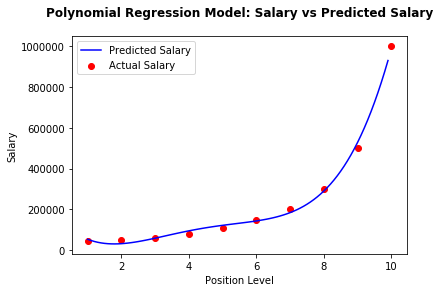

In [94]:
#Same Plot Code
plt.scatter(X, Y, color='red', label='Actual Salary')
#We have to pass coordinates to plot function to make a line X: X and Y: Predicted Line
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color="blue", label="Predicted Salary")

plt.title("Polynomial Regression Model: Salary vs Predicted Salary",pad=20,fontsize=12, fontweight = 'bold')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

## Predicting a new result with Linear Regression

In [95]:
lin_reg.predict([[6.5]])
#Bad Prediction showing us 330K salary for 6.5 year work ex

array([[330378.78787879]])

## Predicting a new result with Polynomial Regression

In [96]:
features_poly_matrix = poly_reg.fit_transform([[6.5]])
lin_reg_2.predict(features_poly_matrix)

#Super close to 160K as mentioned by the company

array([158862.45265153])

## <font color='green'>VERDICT: THE PERSON IS HONEST AND WASN'T LYING ABOUT HIS SALARY AT CURRENT COMPANY. HE ACTUALLY EARNS SOMEWHAT CLOSE TO 160K</font>